In [69]:
from pathlib import Path
import pandas as pd
from pandas import DataFrame
import seaborn as sns

In [70]:
# I know this is hacky - what is the best option to have custom paths in jupyter notebooks? Or should we
# move the benchmark .csv files eventually in this folder?
data_folder: Path = Path("/Users/linusheinzl/Lokale_Dokumente/hyrise/cmake-build-debug")
benchmark_speed_file: Path = data_folder / "benchmark_results.csv"
benchmark_compression_file: Path = data_folder / "bits_per_int.csv"

## Preprocessing

In [71]:
benchmark_speeds: DataFrame = pd.read_csv(benchmark_speed_file)
benchmark_speeds = benchmark_speeds.loc[~benchmark_speeds["name"].str.contains("write_BitsPerInt")]
benchmark_speeds["input_data"] = [name.split("get_with_")[1] for name in benchmark_speeds["name"]]
benchmark_speeds["library"] = [name.split("/")[1].split("_benchmark")[0] for name in benchmark_speeds["name"]]
benchmark_speeds["process_type"] = [name.split("_benchmark_")[1].split("_")[0] for name in benchmark_speeds["name"]]

## Encoding

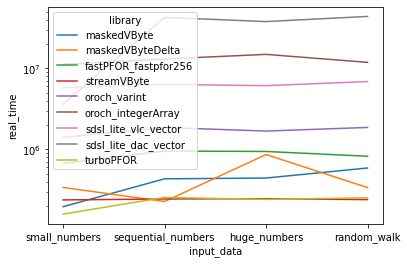

In [72]:
without_decoding: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] != "decoding"]
plot: sns.lineplot = sns.lineplot(data=without_decoding, x="input_data", y="real_time", hue="library")
plot.set_yscale("log")

## Decoding

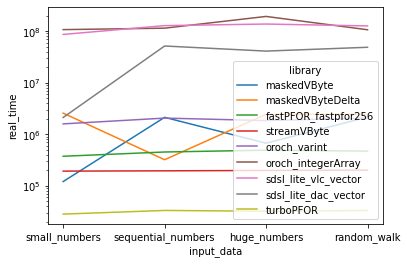

In [73]:
without_encoding: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] != "encoding"]
plot: sns.lineplot = sns.lineplot(data=without_encoding, x="input_data", y="real_time", hue="library")
plot.set_yscale("log")

## Compression

<AxesSubplot:xlabel='dataName', ylabel='bitsPerInt'>

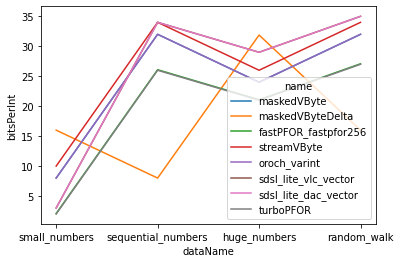

In [77]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]
sns.lineplot(data=compression_stats, x="dataName", y="bitsPerInt", hue="name")